In [1]:
import requests
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# Download the book from Project Gutenberg
url = "http://www.gutenberg.org/files/11/11-0.txt" # Alice in wonderland
response = requests.get(url)
book_text = response.text

In [3]:
book_text[:2000]

'ï»¿The Project Gutenberg eBook of Aliceâ\x80\x99s Adventures in Wonderland, by Lewis Carroll\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: Aliceâ\x80\x99s Adventures in Wonderland\r\n\r\nAuthor: Lewis Carroll\r\n\r\nRelease Date: January, 1991 [eBook #11]\r\n[Most recently updated: October 12, 2020]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\nProduced by: Arthur DiBianca and David Widger\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK ALICEâ\x80\x99S ADVENTURES IN WONDERLAND ***\r\n\r\n[Illustration]\r\n\r\n\r\n\r\n\r\nAliceâ\x80\x9

In [4]:
# Handle encoding issues
book_text = response.text.encode('latin1').decode('utf-8')
book_text[:1000]

'\ufeffThe Project Gutenberg eBook of Alice’s Adventures in Wonderland, by Lewis Carroll\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: Alice’s Adventures in Wonderland\r\n\r\nAuthor: Lewis Carroll\r\n\r\nRelease Date: January, 1991 [eBook #11]\r\n[Most recently updated: October 12, 2020]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\nProduced by: Arthur DiBianca and David Widger\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK ALICE’S ADVENTURES IN WONDERLAND ***\r\n\r\n[Illustration]\r\n\r\n\r\n\r\n\r\nAlice’s Adventures in Wonderland\r

In [5]:
# Split the text into chapters
# Use a regular expression to idetify chapter headings (e.g. "Chapter 1") and split text accordingly
chapter_splits = re.split(r'CHAPTER [IVXLCDM]+\.', book_text)

# Create a list to store the chapter text
chapters = []

# Iterate through chapter_splits and remove extra whitespace
for chapter in chapter_splits[1:]:   # [1:] because we want to ignore the intro/meta data
    chapter = chapter.strip()
    if chapter:
        chapters.append(chapter)
        
# This trims the last chapter to only include text up to 'THE END'
end_index = chapters[-1].find("THE END")
if end_index != -1:
    chapters[-1] = chapters[-1][:end_index].strip()
    
# check results
len(chapters)
# Expect to be 12 chapters (unless splits not completed as expected)

24

In [7]:
chapters[:13]
# First 12 items are chapters from the headings page
# chapters [12] onwards are text

['Down the Rabbit-Hole',
 'The Pool of Tears',
 'A Caucus-Race and a Long Tale',
 'The Rabbit Sends in a Little Bill',
 'Advice from a Caterpillar',
 'Pig and Pepper',
 'A Mad Tea-Party',
 'The Queen’s Croquet-Ground',
 'The Mock Turtle’s Story',
 'The Lobster Quadrille',
 'Who Stole the Tarts?',
 'Alice’s Evidence',
 'Down the Rabbit-Hole\r\n\r\n\r\nAlice was beginning to get very tired of sitting by her sister on the\r\nbank, and of having nothing to do: once or twice she had peeped into\r\nthe book her sister was reading, but it had no pictures or\r\nconversations in it, “and what is the use of a book,” thought Alice\r\n“without pictures or conversations?”\r\n\r\nSo she was considering in her own mind (as well as she could, for the\r\nhot day made her feel very sleepy and stupid), whether the pleasure of\r\nmaking a daisy-chain would be worth the trouble of getting up and\r\npicking the daisies, when suddenly a White Rabbit with pink eyes ran\r\nclose by her.\r\n\r\nThere was nothin

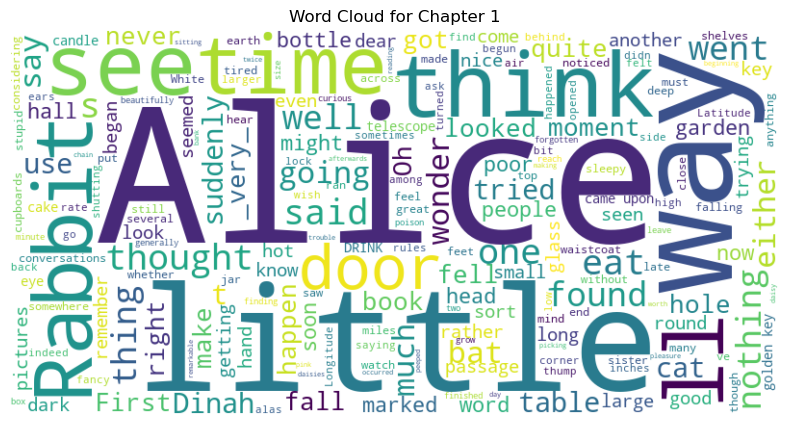

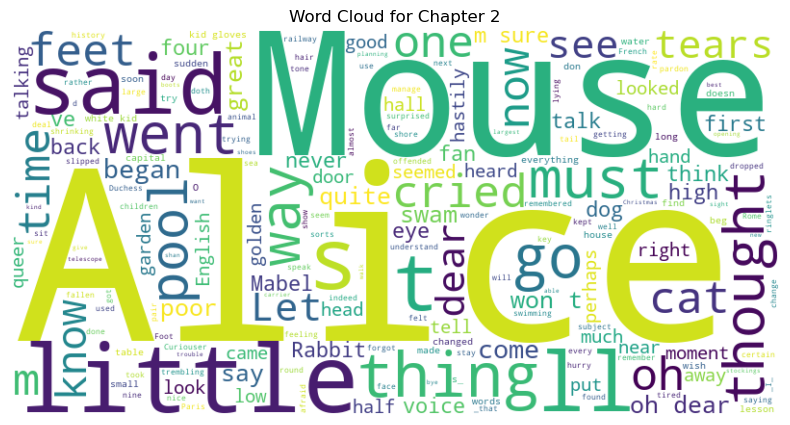

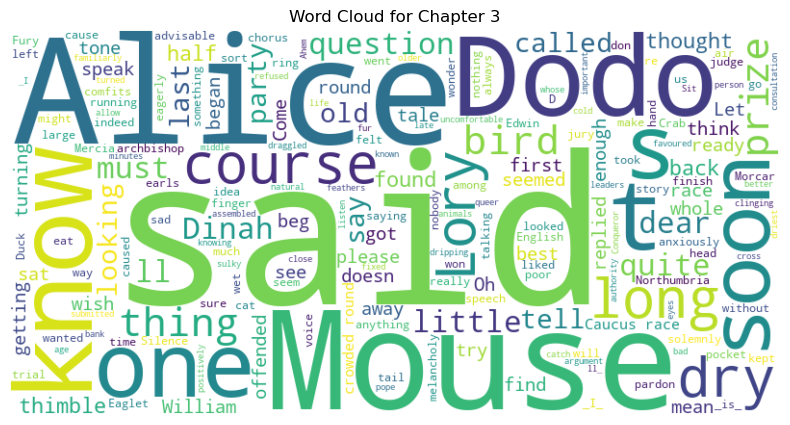

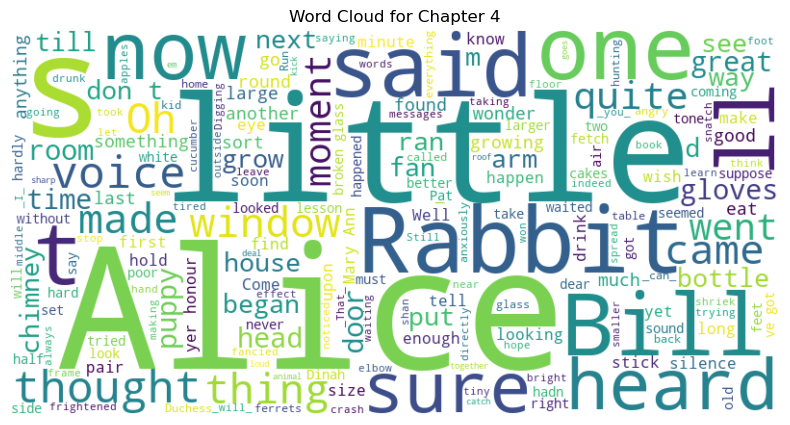

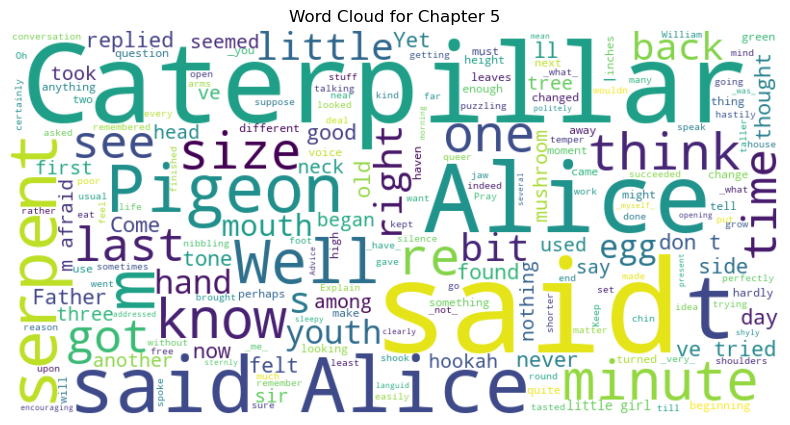

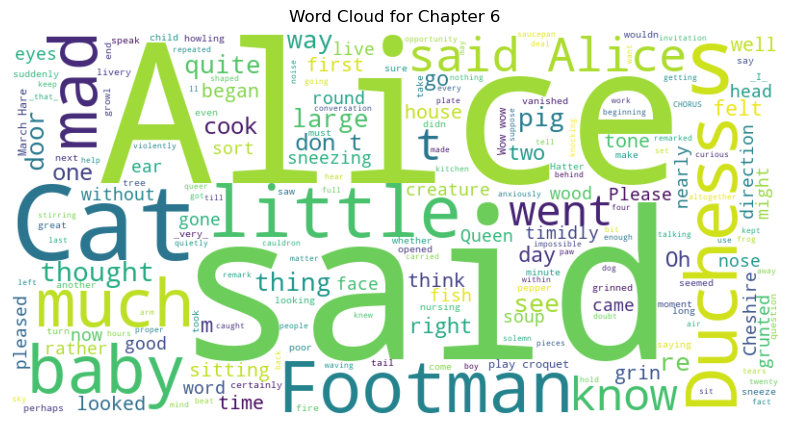

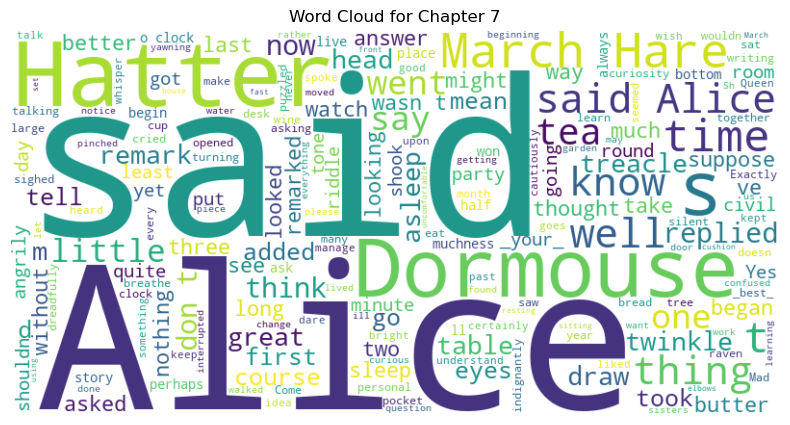

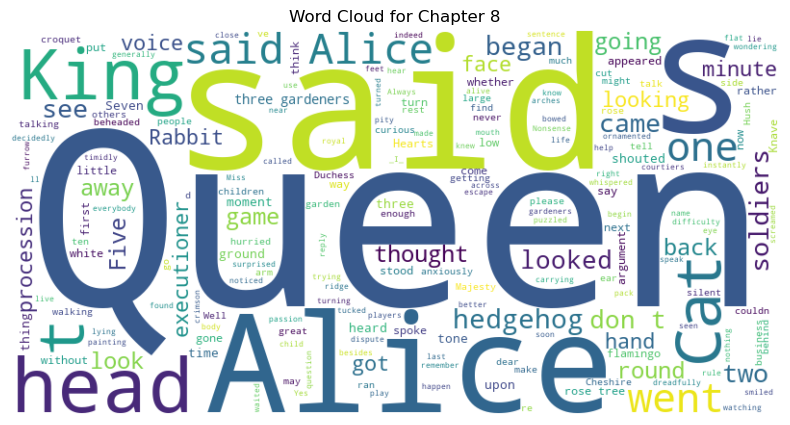

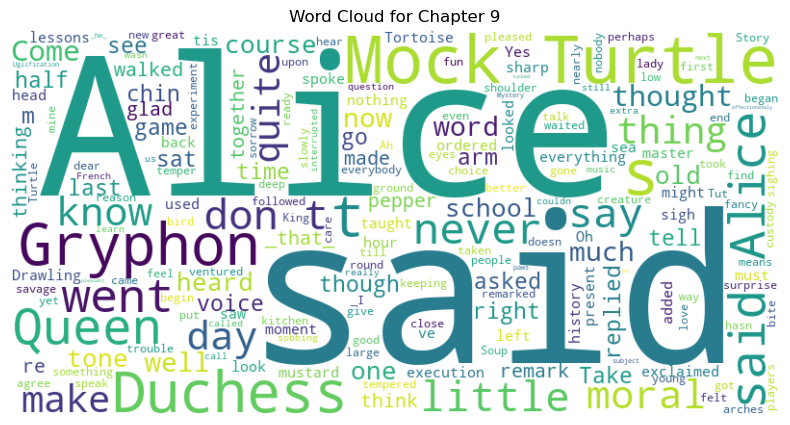

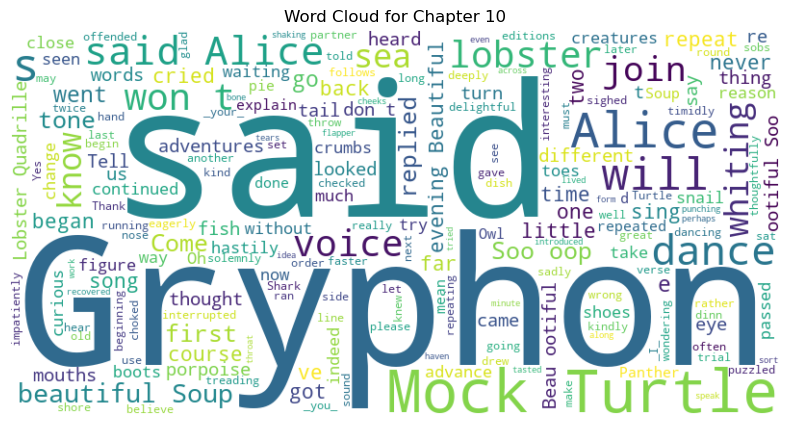

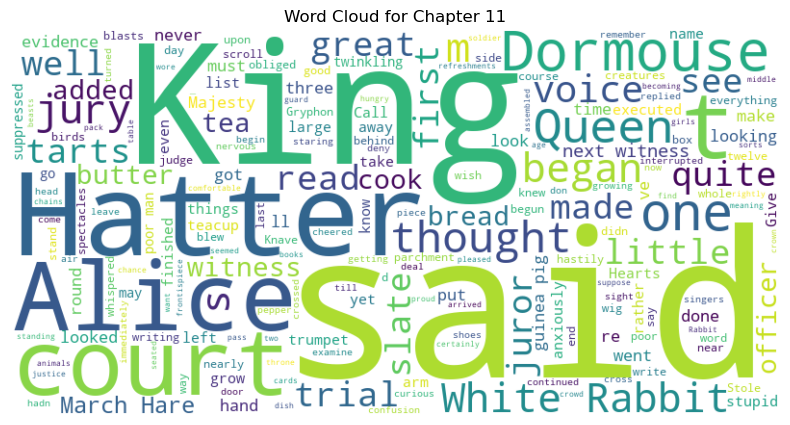

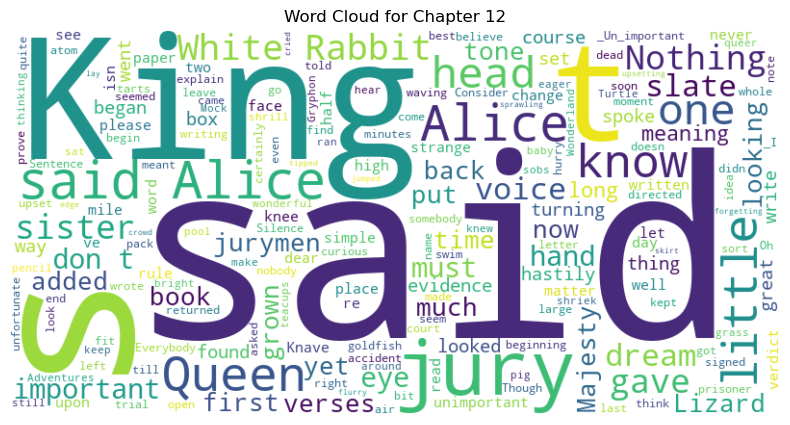

In [8]:
# Create a word cloud for each chapter
for i, chapter in enumerate(chapters[12:]):
    # Initialise WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis')
    
    # Generate word cloud
    wordcloud.generate(chapter)
    
    # Display the word cloud for the chapter
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Chapter {i+1}')
    plt.axis('off')
    plt.show()

In [9]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [10]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...


True

In [11]:
analyzer = SentimentIntensityAnalyzer()

In [12]:
# Create dataframe to store sentiment scores for each chapter
sentiment_df = pd.DataFrame(columns=["Chapter", "Compound Score"])

In [14]:
# Perform sentiment analysis on each chapter
for i, chapter in enumerate(chapters[12:]):
    # Perform sentiment analysis on the chapter text
    sentiment_scores = analyzer.polarity_scores(chapter)
    
    # Extract the compound sentiment score (meansure of overall sentiment)
    compound_score = sentiment_scores['compound']
    
    # Append the results to the dataframe
    sentiment_df = sentiment_df.append({"Chapter": f"Chapter {i+1}", "Compound Score": compound_score}, ignore_index=True)
    
# Display the sentiment analysis results
sentiment_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_8212\3667292444.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_df = sentiment_df.append({"Chapter": f"Chapter {i+1}", "Compound Score": compound_score}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8212\3667292444.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_df = sentiment_df.append({"Chapter": f"Chapter {i+1}", "Compound Score": compound_score}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8212\3667292444.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_df = sentiment_df.append({"Chapter": f"Chapter {i+1}", "Compound Score": compound_score}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipy

Chapter  Compound Score
0    Chapter 1          0.9977
1    Chapter 2          0.7555
2    Chapter 3          0.9929
3    Chapter 4          0.9986
4    Chapter 5         -0.7508
5    Chapter 6          0.9040
6    Chapter 7          0.9562
7    Chapter 8          0.9970
8    Chapter 9         -0.9989
9   Chapter 10          0.9748
10  Chapter 11          0.9749
11  Chapter 12          0.9926